In [1]:
import arviz as az
import numpy as np
from corner import corner


In [2]:
AIES_data = az.from_json('./aies_full', )

In [ ]:
# AIES_data = AIES_data.sel(chain=[i for i in range(50) if i!=20])
# AIES_data = AIES_data.sel(draw=slice(250, None, 10))

array([[<Axes: title={'center': 'M_MN'}>,
        <Axes: title={'center': 'M_MN'}>],
       [<Axes: title={'center': 'M_NFW'}>,
        <Axes: title={'center': 'M_NFW'}>],
       [<Axes: title={'center': 'a_MN'}>,
        <Axes: title={'center': 'a_MN'}>],
       [<Axes: title={'center': 'log_M_MN'}>,
        <Axes: title={'center': 'log_M_MN'}>],
       [<Axes: title={'center': 'log_M_NFW'}>,
        <Axes: title={'center': 'log_M_NFW'}>],
       [<Axes: title={'center': 'log_a_MN'}>,
        <Axes: title={'center': 'log_a_MN'}>],
       [<Axes: title={'center': 'log_r_s'}>,
        <Axes: title={'center': 'log_r_s'}>],
       [<Axes: title={'center': 'r_s'}>, <Axes: title={'center': 'r_s'}>]],
      dtype=object)

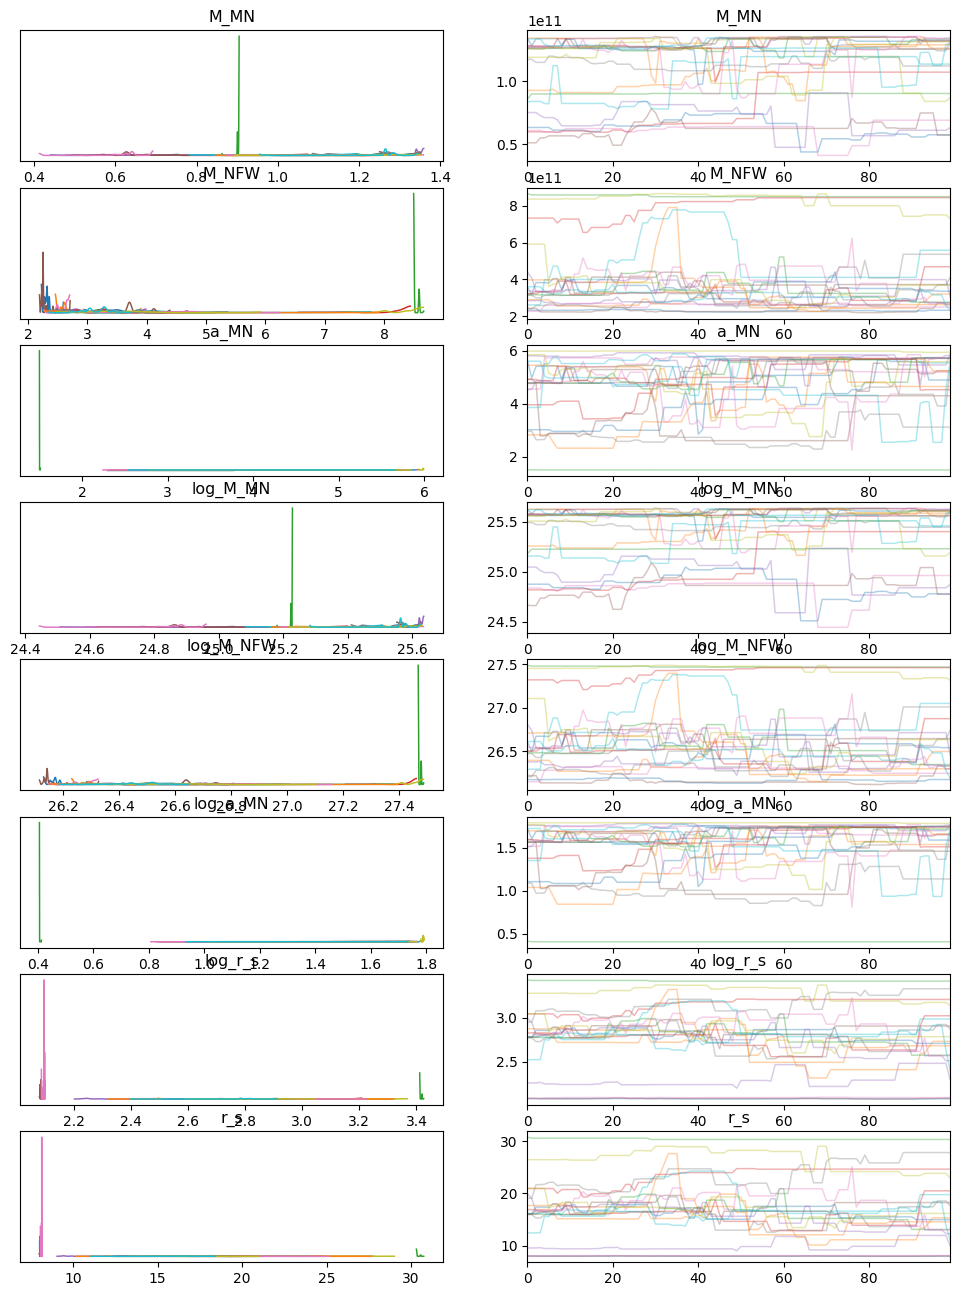

In [3]:
az.plot_trace(AIES_data, compact=False)

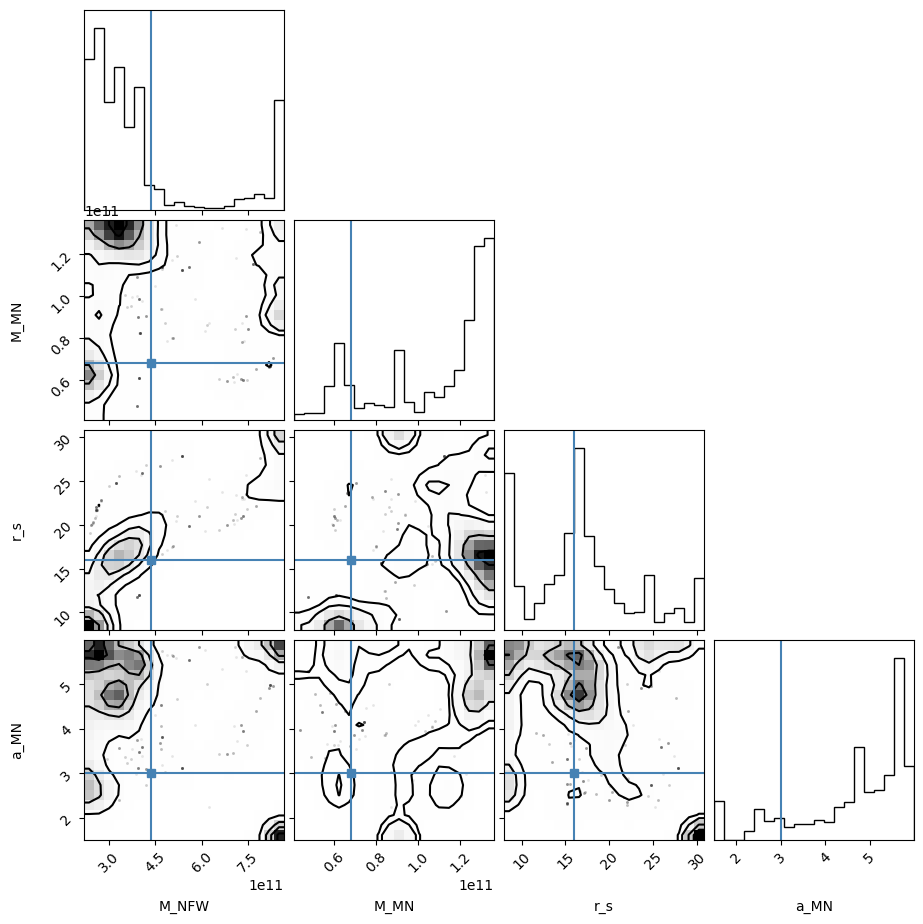

In [9]:
# True parameter values (without code_units transformation)
true_params = np.array([
    4.3683325e11,          # NFW Mvir (Msun)
    16.0,                  # NFW r_s (kpc)
    68_193_902_782.346756, # MN M (Msun)
    3.0,                   # MN a (kpc)
])
true_params_dict = {'M_NFW': true_params[0], 'r_s': true_params[1], 'M_MN': true_params[2], 'a_MN': true_params[3]}
# true_params_dict = {'M_NFW': true_params[0], 'M_MN': true_params[2]}

figure = corner(AIES_data,
                truths=true_params_dict,
                var_names = ['M_NFW', 'M_MN', 'r_s', 'a_MN'],
                # var_names = ['log_M_NFW', 'log_M_MN'],
                smooth=1.0,
                )

In [14]:
az.summary(AIES_data, round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
M_MN,1.077571e+11,2.733444e+10,6.034254e+10,1.359392e+11,5.581850e+09,2.713075e+09,27.8239,50.9502,2.1775
M_NFW,4.029066e+11,1.978066e+11,2.235520e+11,8.498281e+11,4.087671e+10,3.366146e+10,25.6741,35.8252,2.5862
a_MN,4.658400e+00,1.227900e+00,2.348300e+00,5.997100e+00,2.379000e-01,1.856000e-01,27.1396,21.7391,2.2589
log_M_MN,2.536350e+01,2.970000e-01,2.482330e+01,2.563550e+01,6.070000e-02,3.420000e-02,27.8239,50.9502,2.1775
log_M_NFW,2.662800e+01,4.086000e-01,2.614150e+01,2.747230e+01,8.320000e-02,5.780000e-02,25.6741,35.8252,2.5862
log_a_MN,1.489400e+00,3.462000e-01,8.537000e-01,1.791300e+00,6.890000e-02,7.680000e-02,27.1396,21.7391,2.2589
log_r_s,2.751600e+00,3.784000e-01,2.081400e+00,3.340500e+00,7.880000e-02,4.750000e-02,24.1509,21.7391,3.2072
r_s,1.677340e+01,6.037200e+00,8.015500e+00,2.823400e+01,1.250300e+00,8.326000e-01,24.1509,21.7391,3.2072


In [ ]:
az.ess(AIES_data)

<xarray.Dataset> Size: 64B
Dimensions:    ()
Data variables:
    M_MN       float64 8B 27.82
    M_NFW      float64 8B 25.67
    a_MN       float64 8B 27.14
    log_M_MN   float64 8B 27.82
    log_M_NFW  float64 8B 25.67
    log_a_MN   float64 8B 27.14
    log_r_s    float64 8B 24.15
    r_s        float64 8B 24.15

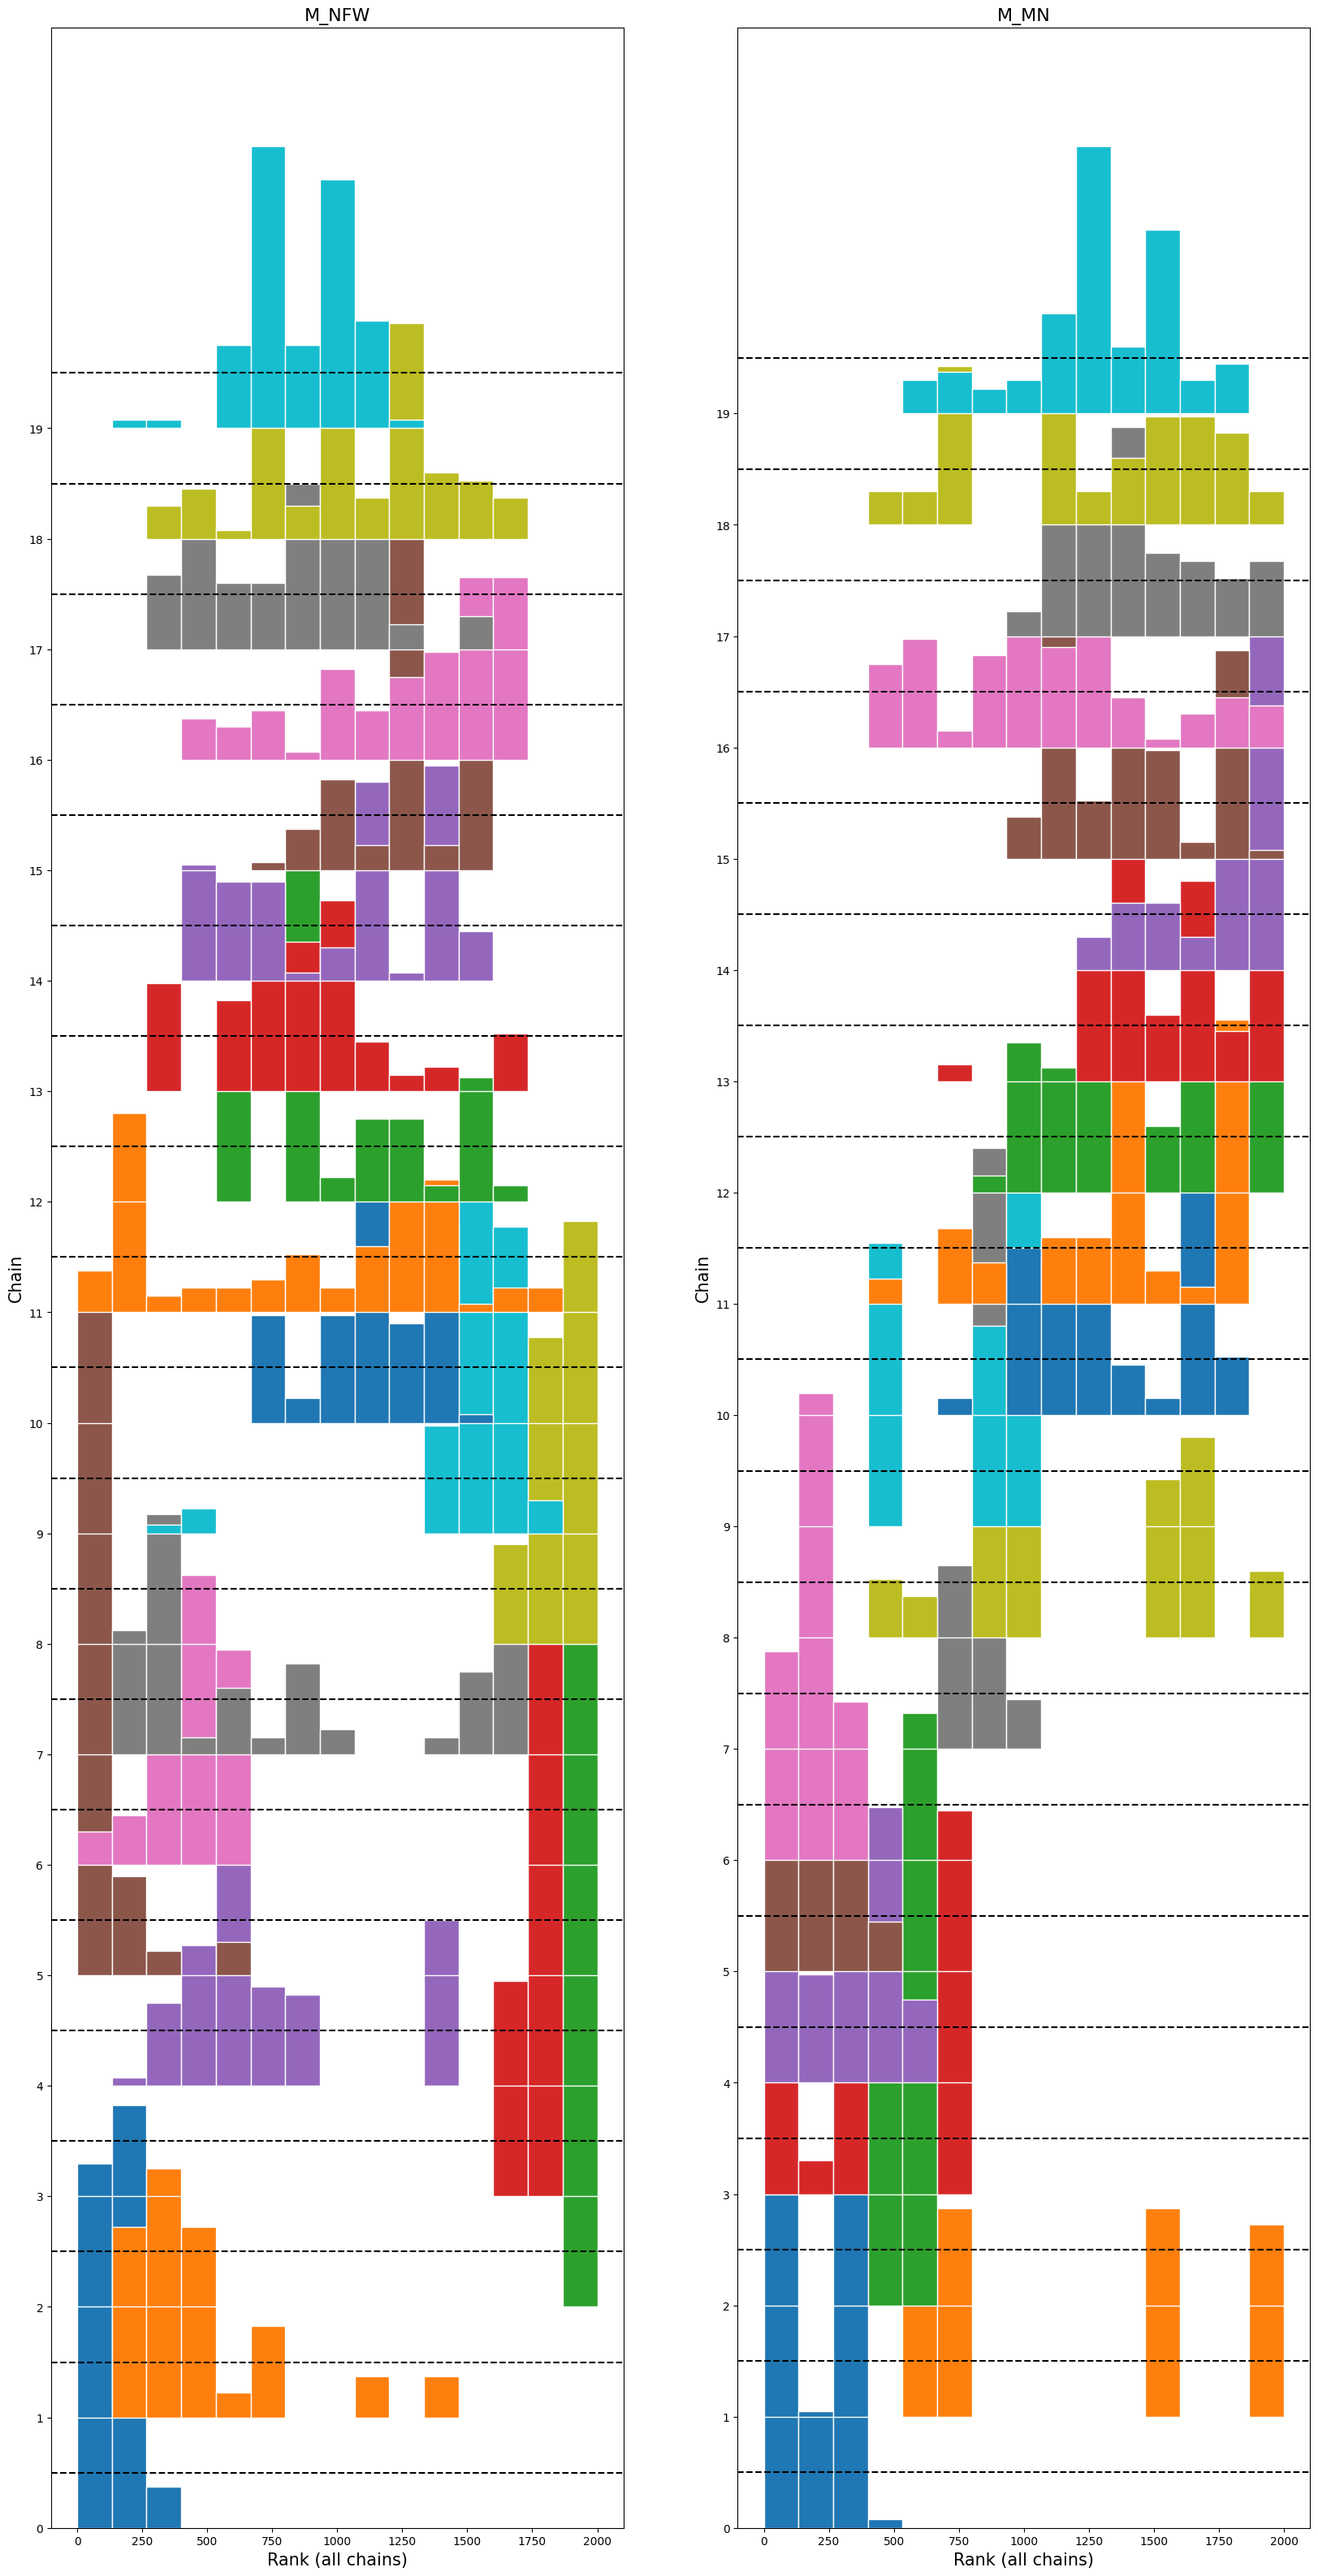

In [12]:
az.plot_rank(AIES_data, var_names=['M_NFW', 'M_MN'], figsize=(20, 40));

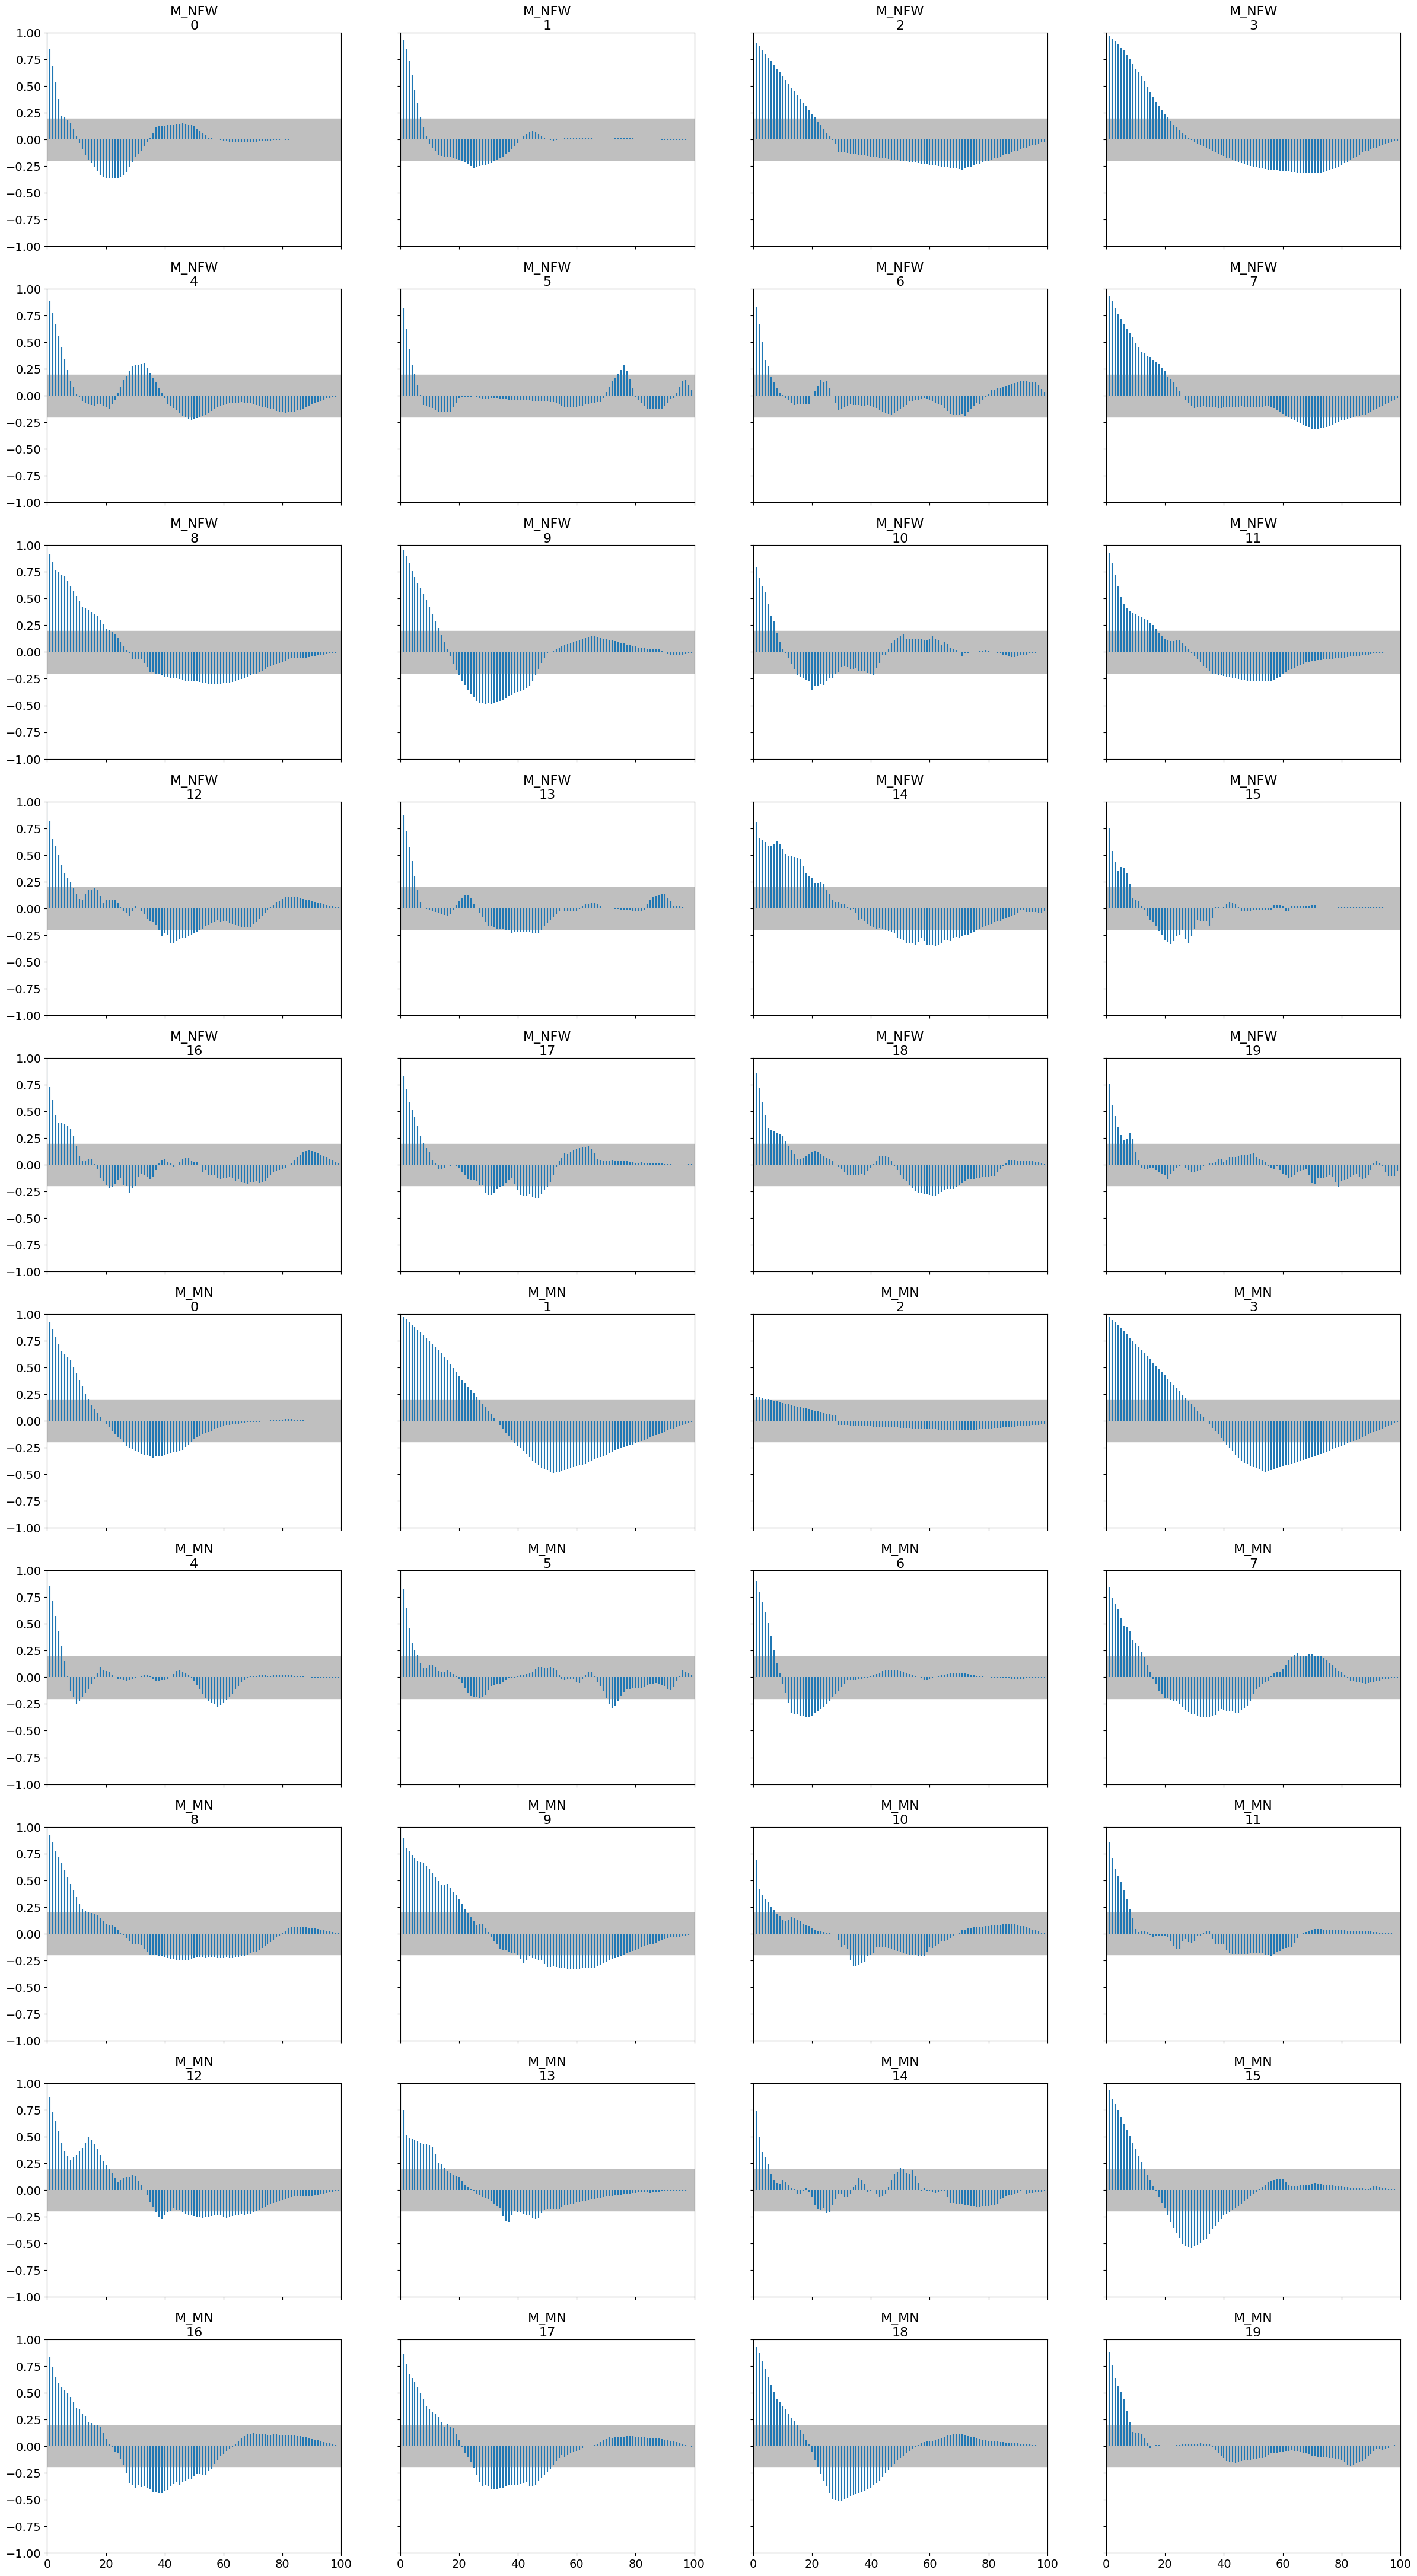

In [13]:
az.plot_autocorr(AIES_data, var_names=['M_NFW', 'M_MN']);